# LOAN APPROVAL PREDICTION MODEL

## DATA IMPORTATION

In [2]:
import pandas as pd

In [3]:
loan=pd.read_csv('loan.csv')

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
loan.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


## Importing Libraries

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## DATA CLEANING

### Checking and fixing for missing values

In [8]:
from sklearn.impute import SimpleImputer

# Drop Loan_ID as it's not useful for prediction
loan.drop(columns=['Loan_ID'], inplace=True)

# Imputing missing values
# For categorical columns, I will use the most frequent value (mode) as the best fit
cat_imputer = SimpleImputer(strategy='most_frequent')
loan[['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term']] = cat_imputer.fit_transform(
    loan[['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term']])

# For numerical columns, I will use the median value as the best fit
num_imputer = SimpleImputer(strategy='median')
loan[['LoanAmount', 'Credit_History']] = num_imputer.fit_transform(loan[['LoanAmount', 'Credit_History']])

In [9]:
# Verifying if there are any remaining missing values
missing_values = loan.isnull().sum()

missing_values

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

###### -we have 0 null values at this moment. Let's proceed with feature engineering where we can enhance the dataset by creating new features such as Total Income
###### - Total Income=applicant income + coapplicant income
###### - we might also add Income to Loan Ratio for a better understanding of teh applicant's financial standing relative to the loan amount


## Feature Engineering

In [10]:
# Creating a new feature for total income
loan['Total_Income'] = loan['ApplicantIncome'] + loan['CoapplicantIncome']

# Creating an Income-to-Loan Ratio feature
loan['Income_Loan_Ratio'] = loan['Total_Income'] / loan['LoanAmount']

In [11]:
# Display the first 5 rows to verify the new features
loan[['Total_Income', 'Income_Loan_Ratio']].head()

,Total_Income,Income_Loan_Ratio
0,5849.0,45.695312
1,6091.0,47.585938
2,3000.0,45.454545
3,4941.0,41.175000
4,6000.0,42.553191


In [12]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Income_Loan_Ratio
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,45.695312
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,47.585938
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,45.454545
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,41.175000
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,42.553191


###### - I have successfully added them. Now, I will proceed with encoding the categorical variables and splitting the data into training and testing sets.

## Splitting the data

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Converting categorical columns to dummy variables
loan = pd.get_dummies(loan, drop_first=True)

# Separating the target variable and feature set
X = loan.drop('Loan_Status_Y', axis=1)  # 'Loan_Status_Y' is the target variable after encoding
y = loan['Loan_Status_Y']

# Splittting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Display dimensions of the train and test sets to verify
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((491, 24), (123, 24), (491,), (123,))

###### - Let's get the best parameters by using Random Forest classification and use of gridsearchcv

## Model Selection and Hyper-parameter Tuning

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the model
model = RandomForestClassifier(random_state=42)

# Set up hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


# Evaluating the Model

###### -Using the best model from our grid search, we can make predictions and evaluate accuracy, precision, recall, and other metrics.

In [15]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict on the test set
y_pred = best_model.predict(X_test)

# Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7723577235772358

Classification Report:
               precision    recall  f1-score   support

       False       0.80      0.47      0.59        43
        True       0.77      0.94      0.84        80

    accuracy                           0.77       123
   macro avg       0.78      0.70      0.72       123
weighted avg       0.78      0.77      0.75       123


Confusion Matrix:
 [[20 23]
 [ 5 75]]


## Feature Importance

###### -I will visualize feature importance to understand which factors contribute most to the loan approval decision.

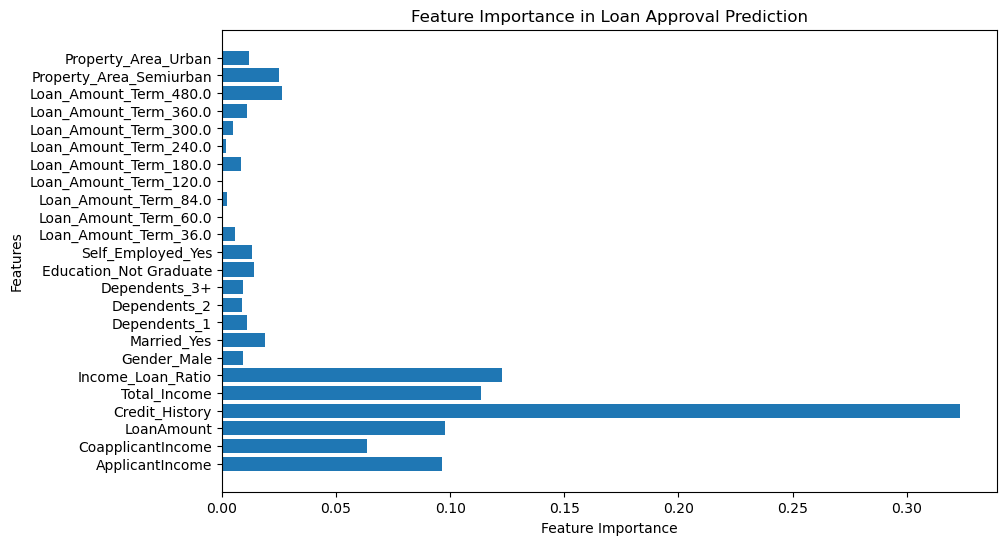

In [16]:
import matplotlib.pyplot as plt

# Extract feature importances
importances = best_model.feature_importances_
features = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Loan Approval Prediction")
plt.show()

###### - We can see that credit history is the most important feature in a loan approval model.
###### - Notable features (2-5): 
###### - 2. Income to loan Ratio
###### - 3. Total Income (Sum of applicant Income and Coapplicant income)
###### - 4. Loan amount
###### - 5. Applicant Income

## Making it more Robust

### Feature Engineering

In [17]:
# Adding Debt-to-Income Ratio
loan['Debt_Income_Ratio'] = loan['LoanAmount'] / loan['Total_Income']

### Model Stacking and Ensembling

###### - I will combine multiple algorithms which can improve performance
###### - Instead of only using one model, I will use ensemble methods such as voter classifier and stacking to combine algorithms 

In [18]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Define base models
model1 = LogisticRegression()
model2 = RandomForestClassifier(random_state=42)
model3 = GradientBoostingClassifier(random_state=42)

# Create a voting classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', model1), ('rf', model2), ('gb', model3)], voting='soft')

# Fit and evaluate
voting_clf.fit(X_train, y_train)
y_pred_voting = voting_clf.predict(X_test)

## Cross-Validation with Stratification

###### - to ensure the data is split in a way that respects the distribution of the target variable I will do cross-validation.
###### - This can lead to a more stable model

In [19]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

# Define stratified k-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cross_val_scores = cross_val_score(best_model, X, y, cv=stratified_kfold, scoring='accuracy')

print("Cross-Validation Scores:", cross_val_scores)
print("Average Cross-Validation Score:", cross_val_scores.mean())


Cross-Validation Scores: [0.80487805 0.82926829 0.82113821 0.75609756 0.79508197]
Average Cross-Validation Score: 0.8012928162068507


###### - This is a rather stable model. having a score of 0.80129 is good

## Another Round of Feature Importance

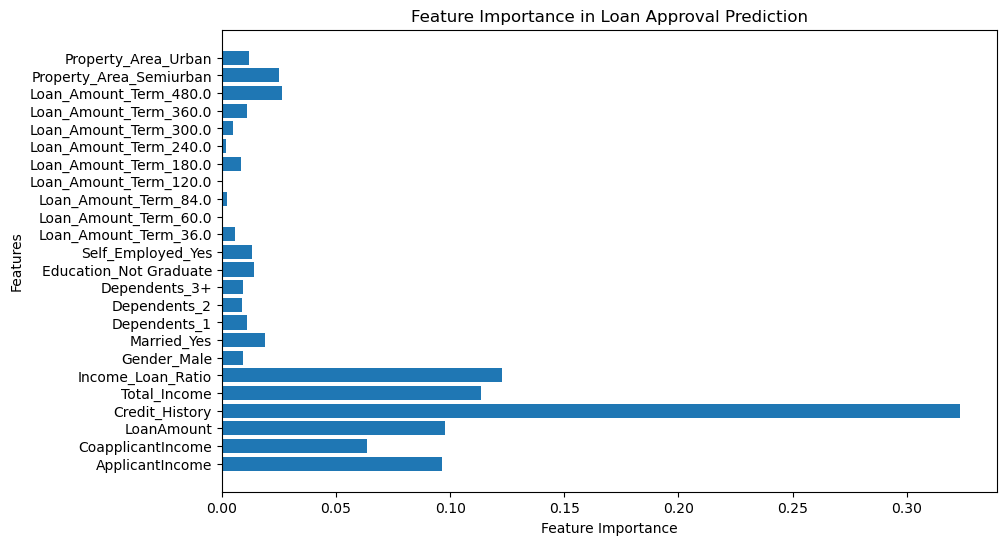

In [24]:
import matplotlib.pyplot as plt

# Extract feature importances
importances = best_model.feature_importances_
features = X.columns

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Loan Approval Prediction")
plt.show()